# 读取转化A文件（含A0文件）

## —— nmc_met_io程序库使用说明

湖北省宜昌市气象局   
王清龙, 2022  ，  气政邮：王清龙/信息保障中心/宜昌市局/湖北省气象局/中国气象局   ，  email : songofsongs@vip.qq.com

湖北省气象局  
杨志彪, 2005  ，OSSMO的开发者，提供了文档技术支持


# A文件介绍
A文件全称为“**地面气象观测数据文件**”，是一种文本格式的文件，文件名以字符A开头，因故简称为A文件。

A文件及A0等文件自2000年逐渐在地面气象观测数据存储领域流行起来。该格式最初由新型自动气象站业务软件OSSMO用于存储地面气象观测月报表格式，赶上各地将纸质历史地面气象观测月报表电子化的浪潮，因此A文件成为了地面气象观测月报表电子化的标准文件。

2014年启用台站地面综合观测业务软件ISOS，加上CIMISS以及后续天擎大数据云平台的发展，目前地面气象观测数据以不在以A文件的方式进行传递交换，但是在各台站和各省气象资料归档仍采用A文件作为重要的离线数据存储。

笔者对比过各个数据渠道获取到的台站历史逐小时地面气象观测数据，发现不同渠道的数据总体一致，但个别数据总有出入。对个别台站数据调查结果表明，经过台站、省、国家三级质控后的A文件数据质量是最优的。

这也是在2022年的今年仍有不少人在网络上苦苦寻找A文件的解析和转化软件的原因。

# 功能和用法


主要提供了两个 API 接口函数，

| 接口函数  |  用途  |
| ------------ | ------------ |
|  ReadAfile | 读取A文件数据，返回元数据和气象观测数据  |
|  A2Excel | 读取A文件，转化成excel（xlsx）格式的地面气象观测预报表  |

## ReadAfile 详细用法

读取A或A0文件,取得内部元数据和气象观测数据

Args:
   - afile (string): A或A0文件的地址.

Return:
  - metadata：A文件中的元数据
  - hourly_datas:月各要素逐小时数据，以20时为日界
  - ssh:日照逐小时数据，以0时为日界
  - dialy_datas:月各要素逐日数据




### metadata
dict 对象，主要存储元数据信息，主要常用的元数据如下 ：

| 名称  | 用途  |
| :------------: | :------------: |
| stationcode  |  区站号 |
| lat  | 站点纬度  |
| lon  | 站点经度  |
| alti |  拔海高度  |
| PRS_alti |  气压传感器拔海高度  |
| year |  储存数据的年份  |
| month |  储存数据的月份  |
| daycounts | 该月共有多少天  |
| OBstrs |  str , 各气象观测要素的标识字符串  |
| OB_ts |  list , 各气象观测要素是否有对应数据存储，若为 0 表示未观测，为 1 表示观测有数据，为 2 表示有观测但全月未出现（例如夏季积雪段常常为 2 ） |
| OB_is |  list , 各气象观测要素在A文件存储的首行位置   |
| OB_ts |  list , 各气象观测要素在A文件存储的方式标识符   |
| OB_units |  list , 各气象观测要素的单位  |
| FJ |  dict , A文件独有，存储A文件的附加信息，如封面、封底、纪要、气候概况等  |




### hourly_datas 
pandas.DataFrame 对象，以气象20时为日界的小时数据，例如11月的A文件存储除日照外气象数据时间为10月31日21时到11月30日20时。

内各 Series 定义如下 ： （hourly_datas不一定全部包含以下所有列）

| 名称  | 用途  | 单位  |
| :------------: | :------------: | :------------: |
| Datetime | 数据时间 | datetime |
| stationcode  |  区站号 |- |
| PRS | 气压 | 百帕 |
| PRS_Sea | 海平面气压 | 百帕 |
| PRS_Max | 最高气压 | 百帕 |
| PRS_Max_OTime | 最高气压出现时间 | - |
| PRS_Min | 最低气压 | 百帕 |
| PRS_Min_OTime | 最低气压出现时间 | - |
| TEM | 温度/气温 | 摄氏度(℃) |
| TEM_Max | 最高气温 | 摄氏度(℃) |
| TEM_Max_OTime | 最高气温出现时间 | - |
| TEM_Min | 最低气温 | 摄氏度(℃) |
| TEM_Min_OTime | 最低气温出现时间 | - |
| DPT | 露点温度 | 摄氏度(℃) |
| RHU | 相对湿度 | 百分率 |
| RHU_Min | 最小相对湿度 | 百分率 |
| RHU_Min_OTIME | 最小相对湿度出现时间 | - |
| VAP | 水汽压 | 百帕 |
| PRE_1h | 过去1小时降水量 | 毫米 |
| PRE_3h | 过去3小时降水量 | 毫米 |
| PRE_6h | 过去6小时降水量 | 毫米 |
| PRE_12h | 过去12小时降水量 | 毫米 |
| PRE_24h | 过去24小时降水量 | 毫米 |
| PRE_Arti_Enc_CYC | 人工加密观测降水量描述周期 | 小时 |
| PRE | 人工加密观测降水量 | 毫米 |
| EVP_Big | 蒸发(大型) | 毫米 |
| WIN_D_Avg_2mi | 2分钟平均风向 | 度 |
| WIN_S_Avg_2mi | 2分钟平均风速 | 米/秒 |
| WIN_D_Avg_10mi | 10分钟平均风向 | 度 |
| WIN_S_Avg_10mi | 10分钟平均风速 | 米/秒 |
| WIN_D_S_Max | 最大风速的风向 | 度 |
| WIN_S_Max | 最大风速 | 米/秒 |
| WIN_S_Max_OTime | 最大风速出现时间 | - |
| WIN_D_INST | 瞬时风向 | 度 |
| WIN_S_INST | 瞬时风速 | 米/秒 |
| WIN_D_INST_Max | 极大风速的风向 | 度 |
| WIN_S_Inst_Max | 极大风速 | 米/秒 |
| WIN_S_INST_Max_OTime | 极大风速出现时间 | - |
| WIN_D_Inst_Max_6h | 过去6小时极大瞬时风向 | 度 |
| WIN_S_Inst_Max_6h | 过去6小时极大瞬时风速 | 米/秒 |
| WIN_D_Inst_Max_12h | 过去12小时极大瞬时风向 | 度 |
| WIN_S_Inst_Max_12h | 过去12小时极大瞬时风速 | 米/秒 |
| GST | 地面温度 | 摄氏度(℃) |
| GST_Max | 最高地面温度 | 摄氏度(℃) |
| GST_Max_Otime | 最高地面温度出现时间 | - |
| GST_Min | 最低地面温度 | 摄氏度(℃) |
| GST_Min_OTime | 最低地面温度出现时间 | - |
| GST_Min_12h | 过去12小时地面最低温度 | 摄氏度(℃) |
| GST_5cm | 5cm地温 | 摄氏度(℃) |
| GST_10cm | 10cm地温 | 摄氏度(℃) |
| GST_15cm | 15cm地温 | 摄氏度(℃) |
| GST_20cm | 20cm地温 | 摄氏度(℃) |
| GST_40Cm | 40cm地温 | 摄氏度(℃) |
| GST_80cm | 80cm地温 | 摄氏度(℃) |
| GST_160cm | 160cm地温 | 摄氏度(℃) |
| GST_320cm | 320cm地温 | 摄氏度(℃) |
| LGST | 草面(雪面)温度 | 摄氏度(℃) |
| LGST_Max | 草面(雪面)最高温度 | 摄氏度(℃) |
| LGST_Max_OTime | 草面(雪面)最高温度出现时间 | - |
| LGST_Min | 草面(雪面)最低温度 | 摄氏度(℃) |
| LGST_Min_OTime | 草面(雪面)最低温度出现时间 | - |
| VIS_HOR_1MI | 1分钟平均水平能见度 | m |
| VIS_HOR_10MI | 10分钟平均水平能见度 | m |
| VIS_Min | 最小水平能见度 | 米 |
| VIS_Min_OTime | 最小水平能见度出现时间 | - |
| VIS | 水平能见度(人工) | 米 |
| CLO_Cov | 总云量 | 百分率 |
| CLO_Cov_Low | 低云量 | 百分率 |
| CLO_COV_LM | 云量(低云或中云) | 百分率 |
| CLO_Height_LoM | 低云或中云的云高 | 米 |
| CLO_FOME_1 | 云状1 | - |
| CLO_Fome_2 | 云状2 | - |
| CLO_Fome_3 | 云状3 | - |
| CLO_Fome_4 | 云状4 | - |
| CLO_FOME_5 | 云状5 | - |
| CLO_FOME_6 | 云状6 | - |
| CLO_FOME_7 | 云状7 | - |
| CLO_Fome_8 | 云状8 | - |
| CLO_Fome_Low | 低云状 | - |
| CLO_FOME_MID | 中云状 | - |
| CLO_Fome_High | 高云状 | - |
| SCO | 地面状态 | - |
| Snow_Depth | 积雪深度 | 厘米 |
| Snow_PRS | 雪压 | 千克/平方米 |
| FRS_1st_Top | 第一冻土层上界值 | 米 |
| FRS_1st_Bot | 第一冻土层下界值 | 米 |
| FRS_2nd_Top | 第二冻土层上界值 | 米 |
| FRS_2nd_Bot | 第二冻土层下界值 | 米 |

### ssh
pandas.DataFrame 对象，以00为日界的小时数据，例如11月的A文件存储日照数据时间为：11月1日1时到12月1日0时。

| 名称  | 用途  | 单位  |
| :------------: | :------------: | :------------: |
| Datetime | 数据时间 | datetime |
| stationcode  |  区站号 |- |
| SSH  |  小时日照  | 小时 |


### dialy_datas
pandas.DataFrame 对象，以气象20时为日界的该月逐日数据。

| 名称  | 用途  | 单位  |
| :------------: | :------------: | :------------: |
| Datetime | 数据时间 | datetime |
| stationcode  |  区站号 |- |
| PRS_Avg | 平均气压 | 百帕 |
| PRS_Sea_Avg | 平均海平面气压 | 百帕 |
| PRS_Max | 最高气压 | 百帕 |
| PRS_Max_OTime | 最高气压出现时间 | - |
| PRS_Min | 最低气压 | 百帕 |
| PRS_Min_OTime | 最低气压出现时间 | - |
| WIN_D | 电线积冰－风向 | 度 |
| WIN_S | 电线积冰－风速 | 米/秒 |
| WIN_S_Max | 最大风速 | 米/秒 |
| WIN_S_Max_OTime | 最大风速出现时间 | - |
| WIN_S_Inst_Max | 极大风速 | 米/秒 |
| WIN_S_INST_Max_OTime | 极大风速出现时间 | - |
| WIN_D_INST_Max | 极大风速的风向 | 度 |
| WIN_D_Avg_2mi_C | 2分钟平均风向(字符型) | 度 |
| WIN_S_2mi_Avg | 平均2分钟风速 | 米/秒 |
| VIS_Avg_10mi_Hourly | 逐小时10分钟平均能见度 | - |
| WIN_S_10mi_Avg | 平均10分钟风速 | 米/秒 |
| WIN_D_S_Max | 最大风速的风向 | 度 |
| TEM | 电线积冰－温度 | 摄氏度(℃) |
| TEM_Avg | 平均气温 | 摄氏度(℃) |
| TEM_Max | 最高气温 | 摄氏度(℃) |
| TEM_Max_OTime | 最高气温出现时间 | - |
| TEM_Min | 最低气温 | 摄氏度(℃) |
| TEM_Min_OTime | 最低气温出现时间 | - |
| GST_Avg_5cm | 平均5cm地温 | 摄氏度(℃) |
| GST_Avg_10cm | 平均10cm地温 | 摄氏度(℃) |
| GST_Avg_15cm | 平均15cm地温 | 摄氏度(℃) |
| GST_Avg_20cm | 平均20cm地温 | 摄氏度(℃) |
| GST_Avg_40cm | 平均40cm地温 | 摄氏度(℃) |
| GST_Avg_80cm | 平均80cm地温 | 摄氏度(℃) |
| GST_Avg_160cm | 平均160cm地温 | 摄氏度(℃) |
| GST_Avg_320cm | 平均320cm地温 | 摄氏度(℃) |
| GST_Avg | 平均地面温度 | 摄氏度(℃) |
| GST_Min | 最低地面温度 | 摄氏度(℃) |
| GST_Min_OTime | 最低地面温度出现时间 | - |
| GST_Max | 最高地面温度 | 摄氏度(℃) |
| GST_Max_Otime | 最高地面温度出现时间 | - |
| LGST_Avg | 平均草面(雪面)温度 | 摄氏度(℃) |
| LGST_Max | 草面(雪面)最高温度 | 摄氏度(℃) |
| LGST_Max_OTime | 草面(雪面)最高温度出现时间 | - |
| LGST_Min | 草面(雪面)最低温度 | 摄氏度(℃) |
| LGST_Min_OTime | 草面(雪面)最低温度出现时间 | - |
| RHU_Avg | 平均相对湿度 | 百分率 |
| VAP_Avg | 平均水气压 | 百帕 |
| RHU_Min | 最小相对湿度 | 百分率 |
| RHU_Min_OTIME | 最小相对湿度出现时间 | - |
| Snow_Depth | 积雪深度 | 厘米 |
| EVP | 蒸发 | 毫米 |
| EVP_Big | 蒸发(大型) | 毫米 |
| PRE_Max_1h | 1小时最大降水量 | 毫米 |
| PRE_Max_1h_OTime | 日小时最大降水量出现时间 | - |
| PRE_Time_2020 | 20-20时降水量 | 毫米 |
| SPRE_Time_2020 | 20-20时固态降水量 | 摄氏度(℃) |
| PRE_Time_0808 | 08-08时降水量 | 毫米 |
| SPRE_Time_0808 | 08-08时固态降水量 | 摄氏度(℃) |
| PRE_Time_2008 | 20-08时降水量 | 毫米 |
| SPRE_Time_2008 | 20-08时固态降水量 | 摄氏度(℃) |
| PRE_Time_0820 | 08-20时降水量 | 毫米 |
| SPRE_Time_0820 | 08-20时固态降水量 | 摄氏度(℃) |
| Snow_PRS | 雪压 | 千克/平方米 |
| SSH | 日照时数 | 时 |
| WIN_D_S_10min_Hourly | 逐小时10分钟平均风向风速 | - |
| CLO_Cov_Avg | 平均总云量 | 0.1 |
| CLO_Cov_Low_Avg | 平均低云量 | 0.1 |
| VIS_Min | 最小水平能见度 | 米 |
| VIS_Min_OTime | 最小水平能见度出现时间 | - |
| SCO | 地面状态 | - |
| WEP_Sumary | 天气现象摘要 | - |
| WEP_Record | 天气现象记录 | - |
| Fz_Rain_SN_Depth | 雨凇—电线积冰-南北方向厚度 | 毫米 |
| Fz_Rain_EW_Depth | 雨凇—电线积冰-东西方向厚度 | 毫米 |
| Fz_Rain_SN_Weight | 雨凇—电线积冰-南北方向重量 | 克 |
| Fz_Rain_EW_Weight | 雨凇—电线积冰-东西方向重量 | 克 |
| Fz_Rain_SN_Di | 雨凇—电线积冰-南北方向直径 | 毫米 |
| Fz_Rain_EW_Di | 雨凇—电线积冰-东西方向直径 | 毫米 |
| Rime_Ice_SN_Depth | 雾凇—电线积冰-南北方向厚度 | 毫米 |
| Rime_Ice_EW_Depth | 雾凇—电线积冰-东西方向厚度 | 毫米 |
| Rime_Ice_SN_Weight | 雾凇—电线积冰-南北方向重量 | 克 |
| Rime_Ice_EW_Weight | 雾凇—电线积冰-东西方向重量 | 克 |
| Rime_Ice_SN_Di | 雾凇—电线积冰-南北方向直径 | 毫米 |
| Rime_Ice_EW_Di | 雾凇—电线积冰-东西方向直径 | 毫米 |
| FRS_1st_Top | 第一冻土层上界值 | 米 |
| FRS_2nd_Top | 第二冻土层上界值 | 米 |
| FRS_1st_Bot | 第一冻土层下界值 | 米 |
| FRS_2nd_Bot | 第二冻土层下界值 | 米 |
| Sunrist_Time | 日出时间 | 时分 |
| Sunset_Time | 日落时间 | 时分 |


In [1]:
import sys
sys.path.append("../nmc_met_io")
from read_a  import ReadAfile,A2Excel

In [2]:
metadata,hourly_datas,ssh,dialy_datas=ReadAfile('./samples/A058237.A11')

In [3]:
hourly_datas.columns

Index(['Datetime', 'Station', 'TEM', 'VAP', 'RHU', 'VIS', 'WIN_D_Avg_10mi',
       'WIN_S_Avg_10mi', 'GST', 'GST_5cm', 'GST_10cm', 'GST_15cm', 'GST_20cm',
       'GST_40Cm', 'GST_80cm', 'GST_160cm', 'GST_320cm'],
      dtype='object')

In [4]:
dialy_datas.columns

Index(['Datetime', 'Station', 'TEM_Max', 'TEM_Min', 'RHU_Min', 'VIS_Min',
       'VIS_Min_OTime', 'PRE_Time_2008', 'PRE_Time_0820', 'PRE_Time_2020',
       'WEP_Record', 'WEP_Sumary', 'EVP_Big', 'WIN_S_Max', 'WIN_D_S_Max',
       'WIN_S_Inst_Max', 'WIN_D_Inst_Max', 'GST_Max', 'GST_Min', 'SSH'],
      dtype='object')

In [5]:
metadata,hourly_datas,ssh,dialy_datas=ReadAfile('./samples/A58237-202111.txt')

In [6]:
hourly_datas.columns

Index(['Datetime', 'Station', 'PRS', 'PRS_Sea', 'TEM', 'DPT', 'VAP', 'RHU',
       'CLO_Cov', 'CLO_Cov_Low', 'CLO_Height_LoM', 'VIS', 'PRE_1h', 'EVP_Big',
       'WIN_D_Avg_2mi', 'WIN_S_Avg_2mi', 'WIN_D_Avg_10mi', 'WIN_S_Avg_10mi',
       'GST', 'GST_5cm', 'GST_10cm', 'GST_15cm', 'GST_20cm', 'GST_40Cm',
       'GST_80cm', 'GST_160cm', 'GST_320cm', 'LGST'],
      dtype='object')

<AxesSubplot:xlabel='Datetime'>

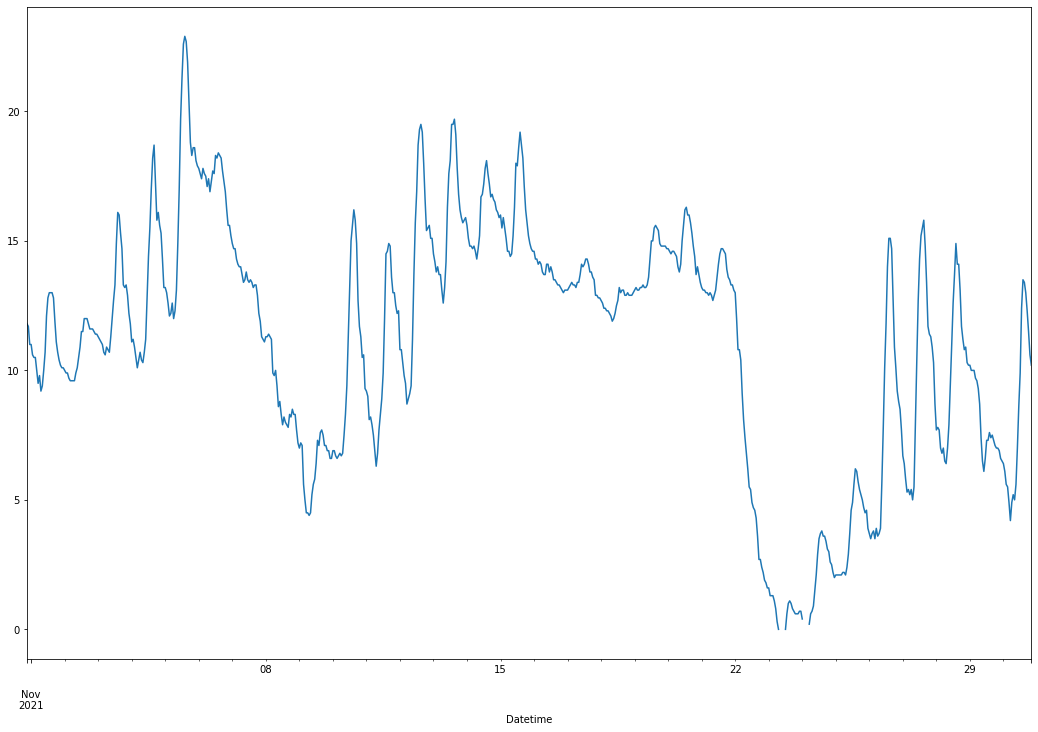

In [7]:
hourly_datas.set_index('Datetime')['TEM'].plot(figsize=(18,12))

In [8]:
dialy_datas.columns

Index(['Datetime', 'Station', 'PRS_Max', 'PRS_Max_OTime', 'PRS_Min',
       'PRS_Min_OTime', 'TEM_Max', 'TEM_Max_OTime', 'TEM_Min', 'TEM_Min_OTime',
       'RHU_Min', 'RHU_Min_OTIME', 'VIS_Min', 'VIS_Min_OTime', 'PRE_Time_2008',
       'PRE_Time_0820', 'PRE_Time_2020', 'WEP_Record', 'WEP_Sumary', 'EVP_Big',
       'WIN_S_Max', 'WIN_D_S_Max', 'WIN_S_Max_OTime', 'WIN_S_Inst_Max',
       'WIN_D_Inst_Max', 'WIN_S_Inst_Max_OTime', 'GST_Max', 'GST_Max_Otime',
       'GST_Min', 'GST_Min_OTime', 'SSH', 'LGST_Max', 'LGST_Max_OTime',
       'LGST_Min', 'LGST_Min_OTime'],
      dtype='object')

<AxesSubplot:xlabel='Datetime'>

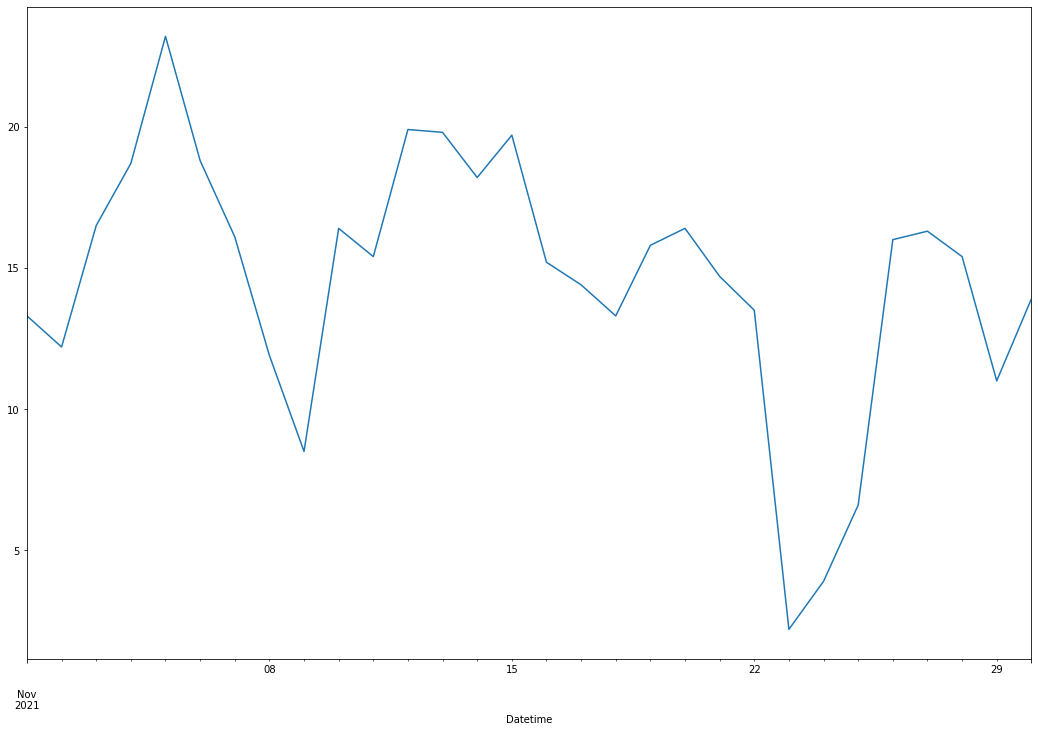

In [9]:
dialy_datas.set_index('Datetime')['TEM_Max'].plot(figsize=(18,12))

## A2Excel 详细用法

读取A或A0文件,转化成 Excel2010 （xlsx）格式表格


Args:
   - afile (string): A或A0文件的地址.
   - excelfile (string):生成excel文件的地址
   - templatefile (string):excel 模板文件地址 默认使用本页内的base64字符串模板
   
Return:
   - None （无返回）

注：使用 openpyxl 操作生成 Excel 文件，两种方式读取 excel 模板；
第一种直接 openpyxl.load_workbook(excel模板文件地址) 方式读取 excel 模板，该模板放在 documents 目录下 “**A文件转Excel模板.xlsx**”；
第二种采用base64将 excel 模板文件编码成字符串，在通过BytesIO传递给 openpyxl.load_workbook 函数，该方式的 excel 模板文件在 Read_A.py 的源代码内
默认采用第二种方式，如果想修改为第一种方式，可通过 templatefile 参数将excel 模板文件传递进函数内


**特别说明：sample目录下的 A058237.A11 和 A58237-202111.TXT 为标准格式下的虚假气象观测数据文件，所有数据都是虚拟生成，无应用价值，仅作为示例使用。**

In [10]:
A2Excel('./samples/A058237.A11','./samples/A058237.xlsx')

In [11]:
A2Excel('./samples/A58237-202111.TXT','./samples/A58237-202111.xlsx')